## Objective Function:

Maximizing the revenue, given as the difference between the reward (profit) and the cost per click times the clicks ( costs ). 

It can be expressed as :
### $$ max_{price,bid}( \sum \limits_{C_i} (price \times soldItems(bid_i, price)) - (clicks(bid_i) \times costPerClick(bid_i))) $$


with the following constraints:
$$ price >= 3  $$
$$ price <= 15  $$
$$ 0 < bid_i < 10  \hspace{5mm} \forall i $$
$$ bid - \sum(costPerClicks) <= dailyBudget  $$


The last constraint is not needed due to the missing of a limited budget. 
    




### Customer Classes  ids :
 
    - Class 0  =  Wealthy and frequent buyer 
    - Class 1  =  Wealthy and not frequent  
    - Class 2  =  Frequent, but "smart"


In [1]:
from customerManager import CustomerManager
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)

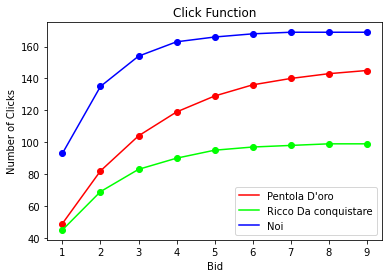

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Data Generation
X = np.arange(1,10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.clicks(c["class_id"], bid = x, noise = False)) 


#Plotting of click function
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Click Function")
    plt.xlabel("Bid")
    plt.ylabel("Number of Clicks")


plt.legend()
plt.show()


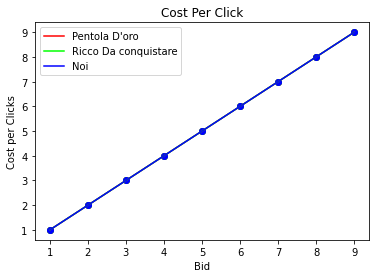

In [3]:
import matplotlib.pyplot as plt
import numpy as np


#Data Generation
X = np.arange(1, 10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.cost_per_click(c["class_id"], bid = x, noise = False)) 


#Plotting 
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Cost Per Click")
    plt.xlabel("Bid")
    plt.ylabel("Cost per Clicks")


plt.legend()
plt.show()

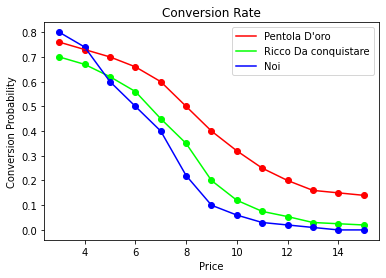

In [4]:
import matplotlib.pyplot as plt
import numpy as np


#Plotting 
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot([i[0] for i in c["conversion_rate_matrix"]],
             [i[1] for i in c["conversion_rate_matrix"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter([i[0] for i in c["conversion_rate_matrix"]],
                [i[1] for i in c["conversion_rate_matrix"]],
                color=colors[c["class_id"]])
    plt.title("Conversion Rate")
    plt.xlabel("Price")
    plt.ylabel("Conversion Probability")


plt.legend()
plt.show()

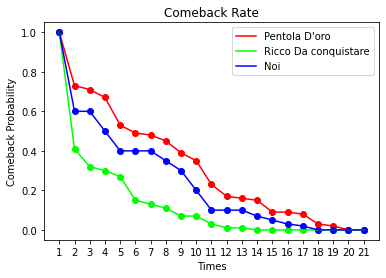

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]

X = np.arange(1, 22)
Y = []


#Data Generation
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.comeback_probability(c["class_id"], times = x, noise = False)) 



#Plotting 
for c in cManager.classes:    
    plt.xticks(X)
    plt.plot(X,
             Y[c["class_id"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X,
                Y[c["class_id"]], 
                color=colors[c["class_id"]])
    plt.title("Comeback Rate")
    plt.xlabel("Times")
    plt.ylabel("Comeback Probability")


plt.legend()
plt.show()


### First step

In the following step we are going to find the best joint (bid, pricing) using the implementation of Non Linear Programming optimization Algorithm provided by the Scipy Library

In [6]:
from customerManager import CustomerManager
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)

In [7]:

X0

[[1.0, 1.0, 1.0, 4.0],
 [2.0, 2.0, 2.0, 5.0],
 [3.0, 3.0, 3.0, 6.0],
 [4.0, 4.0, 4.0, 7.0],
 [5.0, 5.0, 5.0, 8.0],
 [6.0, 6.0, 6.0, 9.0],
 [7.0, 7.0, 7.0, 10.0]]

In [8]:
import numpy as np
import scipy.optimize as opt

count = 0
def objective(x):   
    global count    
    count = count + 1

    #Checks bound of bid 
    res = 0.0
    price = x[3]
    for i in range(3):
        if x[i] < 1 or x[i] > 10 : return 0.0 
    
    for c in cManager.classes : 
        c_id = c["class_id"]
        bid = x[c_id]
        res += (price * cManager.sold_items(class_id = c_id, bid = bid, price = price, noise=False)) - \
              (cManager.cost_per_click(class_id=c_id, bid = bid, noise=False) * cManager.clicks(class_id = c_id, bid = bid,noise=False))
    return -res



# optimize
b_p = (3.0,15.0)
b_b = (1.0 , 10.0)
bnds = (b_b, b_b, b_b, b_p)

methods_with_jac = ['Nelder-Mead','Powell','CG','BFGS','Newton-CG','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr','dogleg','trust-ncg','trust-krylov','trust-exact']
methods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr']

max_value = 0
best_method = 'none'
best_x = None

In [13]:

# perfrom over different model
# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 5.0    #Bid_class0
x0[1] = 5.0    #Bid_class1
x0[2] = 5.0    #Bid_class2
x0[3] = 7.5    #Price
# show initial objective
'''
for x0 in X0:
    print('Initial SSE Objective: ' + str(objective(x0)))
    print(x0)
'''
for m in methods:

    count = 0
    solution = opt.minimize(objective, x0, method = m,  bounds = bnds) 
    x = solution.x
    '''
    print("Start with " + m)
    print('Final SSE Objective: ' + str(-objective(x)))
    print('Objective function runned : ' + str(count))
    # print solution
    print('Solution')
    print('x1 = ' + str(x[0]))
    print('x2 = ' + str(x[1]))
    print('x3 = ' + str(x[2]))
    print('x4 = ' + str(x[3]))
    '''
    if max_value < -objective(x):
        max_value = -objective(x)
        best_method = m
        best_x = x

print("Best method is " + best_method + " with a value of " + str(max_value))
print('Solution')
print('x1 = ' + str(best_x[0]))
print('x2 = ' + str(best_x[1]))
print('x3 = ' + str(best_x[2]))
print('x4 = ' + str(best_x[3]))


C:\Users\franc\anaconda3\envs\dia\lib\site-packages\scipy\optimize\_minimize.py:536: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\franc\anaconda3\envs\dia\lib\site-packages\scipy\optimize\_minimize.py:536: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\franc\anaconda3\envs\dia\lib\site-packages\scipy\optimize\_minimize.py:536: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\franc\anaconda3\envs\dia\lib\site-packages\scipy\optimize\_minimize.py:542: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
C:\Users\franc\anaconda3\envs\dia\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:186: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.',

In [12]:
#perform over different stating points
X0 = []
for i in range(1,8):
    n = float(i)
    if i >= 10:
        n = 9.0
    X0.append([n,n,n,float(i+3)])

for x0 in X0:
    count = 0
    solution = opt.minimize(objective, x0, method = 'Powell',  bounds = bnds) 
    x = solution.x
    if max_value < -objective(x):
        max_value = -objective(x)
        best_method = 'Powell'
        best_x = x

print("Best method is " + best_method + " with a value of " + str(max_value))
print('Solution')
print('x1 = ' + str(best_x[0]))
print('x2 = ' + str(best_x[1]))
print('x3 = ' + str(best_x[2]))
print('x4 = ' + str(best_x[3]))

Best method is trust-constr with a value of 5430.25897536469
Solution
x1 = 5.928954108179956
x2 = 2.682396521822428
x3 = 2.9540452274843294
x4 = 6.541655879916771


## Second step

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
D:\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
100
101
102
103
D:\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
D:\anaconda3

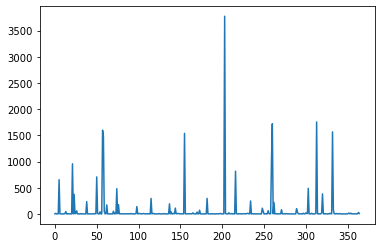

In [3]:
import numpy as np
from matplotlib import pyplot as plt 
from learners import Learner_1
from env import Env_1

#time horizon
T = 365

#budget
budget = float('inf')

learner = Learner_1(noise=1.0)
env = Env_1()

#model_1 is to estiamte clicks
x_observations_model_1 = []
y_observations_model_1 = []

#model_2 is to estiamte sold items
x_observations_model_2 = []
y_observations_model_2 = []

#model_3 is to estiamte revenue
x_observations_model_3 = []
y_observations_model_3 = []

loss_model_1 = []
loss_model_2 = []
loss_model_3 = []

for i in range(T):

    print(i)

    x = env.generateInput()
    y0 = env.round(price = x['price'], bid = x['bid_class_0'], c_id= 0)
    y1 = env.round(price = x['price'], bid = x['bid_class_1'], c_id= 1)
    y2 = env.round(price = x['price'], bid = x['bid_class_2'], c_id= 2)

    #model 1
    new_x_1 = [x['bid_class_0'],x['bid_class_1'],x['bid_class_2']]
    new_y_1 = [y0['clicks'],y1['clicks'],y2['clicks']]
    x_observations_model_1.append(new_x_1)
    y_observations_model_1.append(new_y_1)
    
    learner.fit(x_observations_model_1, y_observations_model_1)
    y_1_pred = learner.predict(x_observations_model_1)
    loss_model_1.append((y_observations_model_1-y_1_pred)**2)

    #model 2
    new_x_2 = [x['price'],x['bid_class_0'],x['bid_class_1'],x['bid_class_2']]
    new_y_2 = [y0['sold_items'],y1['sold_items'],y2['sold_items']]
    x_observations_model_2.append(new_x_2)
    y_observations_model_2.append(new_y_2)
    
    learner.fit(x_observations_model_2, y_observations_model_2)
    y_2_pred = learner.predict(x_observations_model_2)
    loss_model_2.append((y_observations_model_2-y_2_pred)**2)

    #model 3 
    new_x_3 = (new_x_2 + new_y_1 + new_y_2)
    new_y_3 = [y0['revenue'],y1['revenue'],y2['revenue']]
    x_observations_model_3.append(new_x_3)
    y_observations_model_3.append(new_y_3)
    
    learner.fit(x_observations_model_3, y_observations_model_3)
    y_3_pred = learner.predict(x_observations_model_3)
    loss_model_3.append((y_observations_model_3-y_3_pred)**2)



    '''
    #model 2
    new_x_2 = [x['price'],x['bid_class_0'],x['bid_class_1'],x['bid_class_2']]
    new_y_2 = [y0['sold_items'],y1['sold_items'],y2['sold_items']]

    x_observations_model_2 = np.append(x_observations_model_2, new_x_2)
    y_observations_model_2 = np.append(y_observations_model_2, new_y_2)

    #model 3
    new_x_3 = np.concatenate((new_x_2,new_y_1, new_y_2))
    new_y_3 = [y0['revenue'],y1['revenue'],y2['revenue']]   

    x_observations_model_3 = np.append(x_observations_model_3, new_x_3)
    y_observations_model_3 = np.append(y_observations_model_3, new_y_3)

    
    learner.fit(x_observations_model_1,y_observations_model_1)
    y_1_pred = learner.predict(new_x_1)

    '''
    '''
    learner.fit(x_observations_model_2,y_observations_model_2)
    y_2_pred = learner.predict(x_observations_model_2)

    learner.fit(x_observations_model_3,y_observations_model_3)
    y_3_pred = learner.predict(x_observations_model_3)

    loss_model_1.append(new_y_1 - y_1_pred)
    '''
'''
yy = [i[0] for i in loss_model_1]
plt.plot(range(T), yy)
plt.show()
'''

yy = [i[0] for i in loss_model_3[-1]]
print(yy)
plt.plot(range(T), yy)
plt.show()









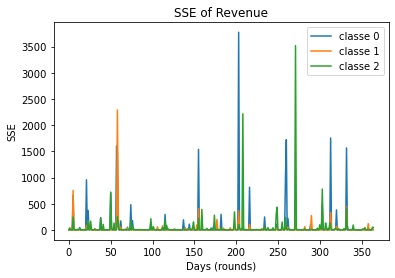

In [6]:

yy_class0 = [i[0] for i in loss_model_3[-1]]
yy_class1 = [i[1] for i in loss_model_3[-1]]
yy_class2 = [i[2] for i in loss_model_3[-1]]

plt.plot(range(T), yy_class0, label="classe 0")
plt.plot(range(T), yy_class1, label="classe 1")
plt.plot(range(T), yy_class2, label="classe 2")
plt.title("SSE of Revenue")
plt.xlabel("Days (rounds)")
plt.ylabel("SSE")
plt.legend()
plt.show()




  2%|▏         | 1/50 [00:00<00:10,  4.69it/s]C:\Users\franc\anaconda3\envs\dia\lib\site-packages\sklearn\gaussian_process\kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
 18%|█▊        | 9/50 [00:02<00:14,  2.83it/s]C:\Users\franc\anaconda3\envs\dia\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 20%|██        | 10/50 [00:03<00:14,  2.68it/s]C:\Users\franc\anaconda3\envs\dia\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

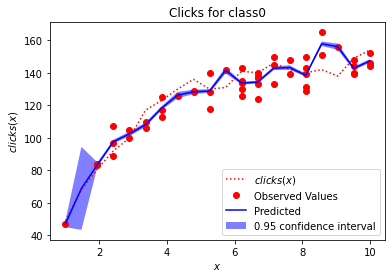

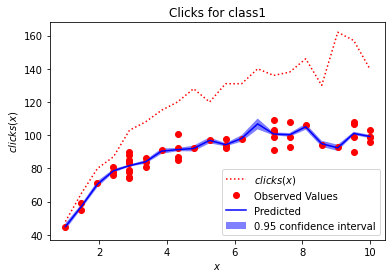

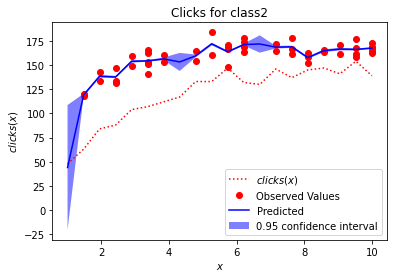

100%|██████████| 50/50 [00:22<00:00,  2.20it/s]


In [6]:
# instaed of give all the inputs and all the outpts to the models, just simplify the input and output in order to create more specific dataset
import numpy as np
from matplotlib import pyplot as plt 
from learners import Learner_1
from env import Env_1
from tqdm import tqdm
from random import seed
from random import randint

seed(1234)

def plotGraph(x_pred,y_pred,X,Y,sigma,function='n',title = "no title"):
    plt.figure(i)
    plt.title(title)
    plt.plot(x_pred, env.roundClicks(x_pred,c_id =0), 'r:', label = '$'+function+'(x)$')
    plt.plot(X.ravel(), Y, 'ro', label = 'Observed Values')
    plt.plot(x_pred, y_pred, 'b-', label = 'Predicted')
    plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
             np.concatenate([y_pred - 1.96 * sigma, (y_pred + 1.96 * sigma)[::-1]]),
             alpha=.5, fc = 'b', ec = 'None', label= '0.95 confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$'+function+'(x)$')
    plt.legend(loc='lower right')
    plt.show()

#time horizon
T = 50

#budget
budget = float('inf')

learner = Learner_1(noise=1.0)
env = Env_1()

#model_1 is to estiamte clicks
observation_model_1 = {
    'class_0':{
        'x':np.array([]),
        'y':np.array([])
    },
    'class_1':{
        'x':np.array([]),
        'y':np.array([])
    },
    'class_2':{
        'x':np.array([]),
        'y':np.array([])
    },
}

aggregate = False
for i in tqdm(range(T)):
    x = env.generateInput()
    
    # not aggregate form we should generate one model for each function
    # model for each class for clicks problem
    if not aggregate:
        for c in range(3):
            y = env.round(price = x['price'], bid = x['bid_class_'+str(c)], c_id= c)
            
            new_x = x['bid_class_'+str(c)]
            new_y = y['clicks']

            observation_model_1['class_'+str(c)]['x']= np.append(observation_model_1['class_'+str(c)]['x'],new_x)
            observation_model_1['class_'+str(c)]['y']= np.append(observation_model_1['class_'+str(c)]['y'],new_y)

            X = np.atleast_2d(observation_model_1['class_'+str(c)]['x']).T
            Y = observation_model_1['class_'+str(c)]['y'].ravel()

            learner.fit(X, Y)

            x_pred = np.atleast_2d(env.bids).T
            y_pred, sigma = learner.predict(x_pred, return_std = True)
            
            # plot only the last graph
            if i == T - 1:
                plotGraph(x_pred,y_pred,X,Y,sigma,function='clicks',title='Clicks for class '+str(c))
    
    # for aggreate model we just create one prediction with sample from random class
    else:
        c = randint(0,2)

        y = env.round(price = x['price'], bid = x['bid_class_'+str(c)], c_id= c)
            
        new_x = x['bid_class_'+str(c)]
        new_y = y['clicks']

        observation_model_1['class_'+str(c)]['x']= np.append(observation_model_1['class_'+str(c)]['x'],new_x)
        observation_model_1['class_'+str(c)]['y']= np.append(observation_model_1['class_'+str(c)]['y'],new_y)

        X = np.atleast_2d(observation_model_1['class_'+str(c)]['x']).T
        Y = observation_model_1['class_'+str(c)]['y'].ravel()

        learner.fit(X, Y)

        x_pred = np.atleast_2d(env.bids).T
        y_pred, sigma = learner.predict(x_pred, return_std = True)
        
        # plot only the last graph
        if i == T - 1:
            plotGraph(x_pred,y_pred,X,Y,sigma,function='clicks',title='Clicks with aggregate data')
    



In [14]:
x = np.array([])
x = np.append(x,5.0)
x

array([5.])